In [7]:
import networkx as nx

# Load the GML file
G = nx.read_gml('/kaggle/input/karate/karate.gml')

# Display basic information about the network
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())


Number of nodes: 34
Number of edges: 78
Average degree: 4.588235294117647


In [8]:
# Assuming node metadata is stored in node attributes
metadata = {node: G.nodes[node] for node in G.nodes()}
print(metadata)


{'1': {}, '2': {}, '3': {}, '4': {}, '5': {}, '6': {}, '7': {}, '8': {}, '9': {}, '10': {}, '11': {}, '12': {}, '13': {}, '14': {}, '15': {}, '16': {}, '17': {}, '18': {}, '19': {}, '20': {}, '21': {}, '22': {}, '23': {}, '24': {}, '25': {}, '26': {}, '27': {}, '28': {}, '29': {}, '30': {}, '31': {}, '32': {}, '33': {}, '34': {}}


In [9]:
import pandas as pd

# Calculating centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)

# Creating a DataFrame for analysis
centrality_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank_centrality
})

print(centrality_df)


      degree  betweenness  closeness  eigenvector  pagerank
1   0.484848     0.437635   0.568966     0.355483  0.097002
2   0.272727     0.053937   0.485294     0.265954  0.052878
3   0.303030     0.143657   0.559322     0.317189  0.057078
4   0.181818     0.011909   0.464789     0.211174  0.035861
5   0.090909     0.000631   0.379310     0.075966  0.021979
6   0.121212     0.029987   0.383721     0.079481  0.029113
7   0.121212     0.029987   0.383721     0.079481  0.029113
8   0.121212     0.000000   0.440000     0.170955  0.024491
9   0.151515     0.055927   0.515625     0.227405  0.029765
10  0.060606     0.000848   0.434211     0.102675  0.014309
11  0.090909     0.000631   0.379310     0.075966  0.021979
12  0.030303     0.000000   0.366667     0.052854  0.009565
13  0.060606     0.000000   0.370787     0.084252  0.014645
14  0.151515     0.045863   0.515625     0.226470  0.029536
15  0.060606     0.000000   0.370787     0.101406  0.014535
16  0.060606     0.000000   0.370787    

In [10]:
from networkx.algorithms import approximation as approx

# k-components
k_components = approx.k_components(G)
print("k-components:", k_components)

# Clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print("Average clustering coefficient:", clustering_coefficient)


k-components: defaultdict(<class 'list'>, {1: [{'18', '15', '26', '4', '28', '19', '25', '24', '17', '33', '30', '2', '1', '27', '8', '5', '11', '21', '16', '3', '6', '22', '29', '13', '14', '7', '9', '10', '31', '23', '34', '20', '12', '32'}], 2: [{'18', '21', '16', '3', '15', '26', '22', '13', '14', '4', '28', '9', '10', '19', '25', '31', '24', '23', '33', '34', '30', '2', '32', '1', '20', '29', '27', '8'}, {'17', '5', '11', '1', '6', '7'}], 3: [{'9', '3', '24', '31', '33', '34', '30', '29', '2', '32', '1', '20', '14', '4', '28', '8'}, {'5', '11', '1', '6', '7'}], 4: [{'9', '3', '31', '33', '34', '2', '1', '14', '4', '8'}]})
Average clustering coefficient: 0.5706384782076823


In [11]:
from networkx.algorithms.community import girvan_newman
from community import community_louvain

# Girvan-Newman
communities_gn = next(girvan_newman(G))
print("Girvan-Newman communities:", list(communities_gn))

# Louvain
partition = community_louvain.best_partition(G)
print("Louvain communities:", partition)


Girvan-Newman communities: [{'18', '5', '11', '14', '12', '17', '22', '13', '2', '1', '20', '6', '4', '7', '8'}, {'15', '26', '28', '25', '24', '33', '30', '27', '21', '16', '3', '9', '10', '31', '23', '34', '32', '29', '19'}]
Louvain communities: {'1': 0, '2': 0, '3': 0, '4': 0, '5': 3, '6': 3, '7': 3, '8': 0, '9': 1, '10': 0, '11': 3, '12': 0, '13': 0, '14': 0, '15': 1, '16': 1, '17': 3, '18': 0, '19': 1, '20': 0, '21': 1, '22': 0, '23': 1, '24': 1, '25': 2, '26': 2, '27': 1, '28': 1, '29': 2, '30': 1, '31': 1, '32': 2, '33': 1, '34': 1}


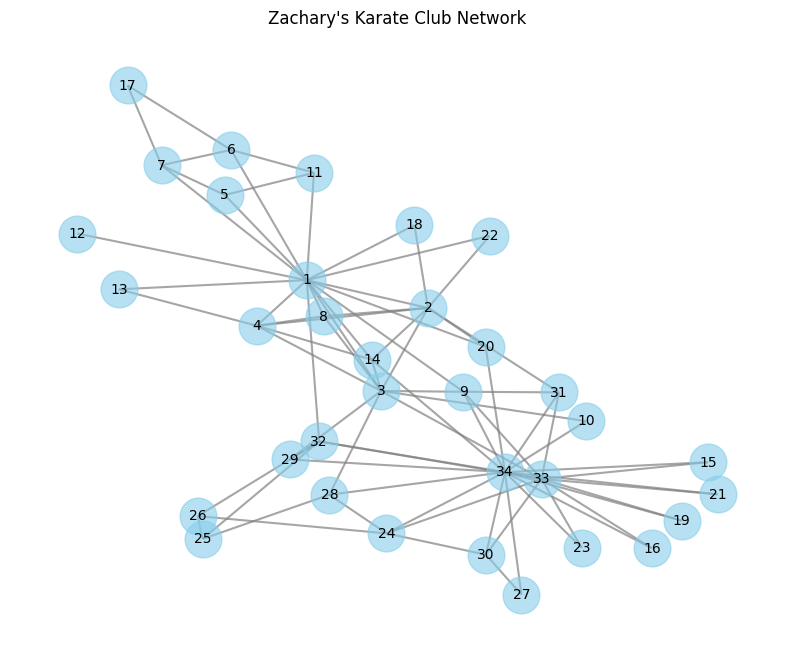

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(gml_path):
    # Load the graph from the GML file
    G = nx.read_gml('/kaggle/input/karate/karate.gml')

    # Draw the graph
    plt.figure(figsize=(10, 8))  # Set the size of the plot
    pos = nx.spring_layout(G)  # Positions for all nodes using one of the layout options

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.6)

    # Edges
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color='gray')

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title('Zachary\'s Karate Club Network')
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph

# Example usage
gml_path = 'karate.gml'  # Change this to the path of your karate GML file
plot_graph(gml_path)
